<a href="https://colab.research.google.com/github/ILY-OGAMA/Linear-Regression-Model/blob/main/Multiple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 2017_Yellow_Taxi_Trip_Data.csv to 2017_Yellow_Taxi_Trip_Data.csv


In [ ]:
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [ ]:
df1=df.copy()
df1.shape

(22699, 18)

In [ ]:
#Check for missing values
df1.isna().sum().sum()

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
df1.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime

In [ ]:
# Convert `tpep_pickup_datetime` to datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df1['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')


In [ ]:
# Create `duration` column
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')

###Outliers

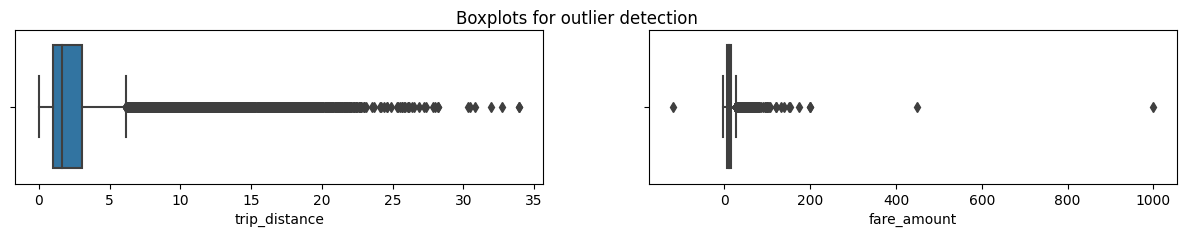

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df1['trip_distance'])
sns.boxplot(ax=axes[1], x=df1['fare_amount'])
plt.show();

1. All three variables contain outliers. Some are extreme, but others not so much.

2. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for `fare_amount` and `duration` definitely seem to have problematic outliers on the higher end.

3. Probably not for the latter two, but for `trip_distance` it might be okay.

In [ ]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df1['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

In [ ]:
#Count of rides when 'trip_distance' is zero
sum(df1['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the trip_distance column will remain untouched with regard to outliers.

Fare anount outliers

In [ ]:
df1['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the fare_amount column is large and the extremes don't make much sense.

Low values: Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

High values: The maximum fare amount in this dataset is nearly  1,000,𝑤ℎ𝑖𝑐ℎ𝑠𝑒𝑒𝑚𝑠𝑣𝑒𝑟𝑦𝑢𝑛𝑙𝑖𝑘𝑒𝑙𝑦.𝐻𝑖𝑔ℎ𝑣𝑎𝑙𝑢𝑒𝑠𝑓𝑜𝑟𝑡ℎ𝑖𝑠𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑐𝑎𝑛𝑏𝑒𝑐𝑎𝑝𝑝𝑒𝑑𝑏𝑎𝑠𝑒𝑑𝑜𝑛𝑖𝑛𝑡𝑢𝑖𝑡𝑖𝑜𝑛𝑎𝑛𝑑𝑠𝑡𝑎𝑡𝑖𝑠𝑡𝑖𝑐𝑠.𝑇ℎ𝑒𝑖𝑛𝑡𝑒𝑟𝑞𝑢𝑎𝑟𝑡𝑖𝑙𝑒𝑟𝑎𝑛𝑔𝑒(𝐼𝑄𝑅)𝑖𝑠
 8. The standard formula of Q3 + (1.5 * IQR) yields $26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of 6, which results in a cap of $62.50.

Impute values less than $0 with 0.

In [ ]:
# Impute values less than $0 with 0
df1.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df1['fare_amount'].min()

0.0

In [ ]:
def outlier_imputer(column_list, iqr_factor):
  for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df1.loc[df1[col] > upper_threshold, col] = upper_threshold
        print(df1[col].describe())
        print()

In [ ]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



duration outliers

In [ ]:
df1['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The duration column has problematic values at both the lower and upper extremities.

Low values: There should be no values that represent negative time. Impute all negative durations with 0.

High values: Impute high values the same way you imputed the high-end outliers for fares: Q3 + (6 * IQR).

In [ ]:
# Impute a 0 for any negative values
df1.loc[df1['duration'] < 0, 'duration'] = 0
df1['duration'].min()

0.0

In [ ]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Task 3a. Feature engineering

Create mean_distance column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know.

Create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.

In [ ]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype('string') + ' ' + df1['DOLocationID'].astype('string')

Use a groupby() statement to group each row by the new pickup_dropoff column, compute the mean, and capture the values only in the trip_distance column. Assign the results to a variable named grouped

In [ ]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]

Convert `grouped` to a dictionary

In [ ]:
grouped_dict = grouped.to_dict()
# Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

Create a mean_distance column that is a copy of the pickup_dropoff helper column.

Use the map() method on the mean_distance series. Pass grouped_dict as its argument. Reassign the result back to the mean_distance series. When you pass a dictionary to the Series.map() method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary

In [ ]:
df1['mean_distance'] = df1['pickup_dropoff']
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

Create mean_duration column¶
Repeat the process used to create the mean_distance column to create a mean_duration column.

In [ ]:
grouped = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_dict)


Create day and month columns
Create two new columns, day (name of day) and month (name of month) by extracting the relevant information from the tpep_pickup_datetime column.

Create rush_hour column
Define rush hour as:

Any weekday (not Saturday or Sunday) AND
Either from 06:00–10:00 or from 16:00–20:00
Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [ ]:
# Create 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [ ]:
# Create 'rush_hour' col
df1['rush_hour'] = df1['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [ ]:
# Apply the `rush_hourizer()` function to the new column
df1['rush_hour'] = df1.apply(rush_hourizer, axis=1)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,0,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,0,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,1,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,0,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,0,saturday,apr


Scatter plot
Create a scatterplot to visualize the relationship between mean_duration and fare_amount.

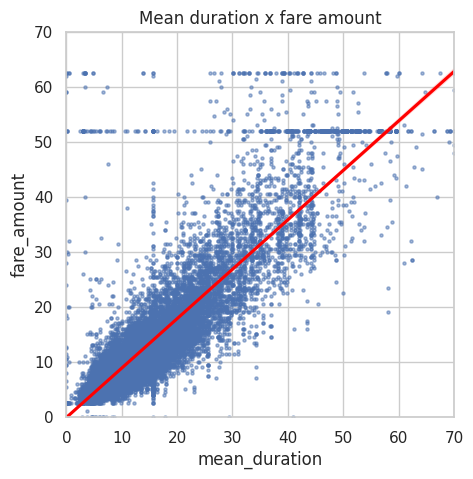

In [ ]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['mean_duration'], y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The mean_duration variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [ ]:
df1[df1['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of  5.76𝑎𝑛𝑑
 5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for 'new york city taxi flat rate '$52'' indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [ ]:
df2 = df1.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

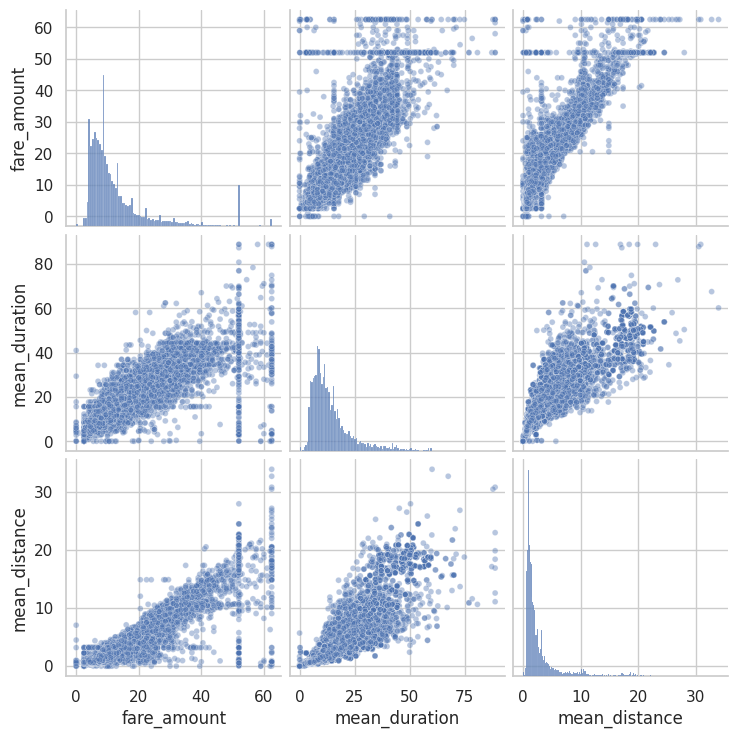

In [ ]:
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

Identify correlations

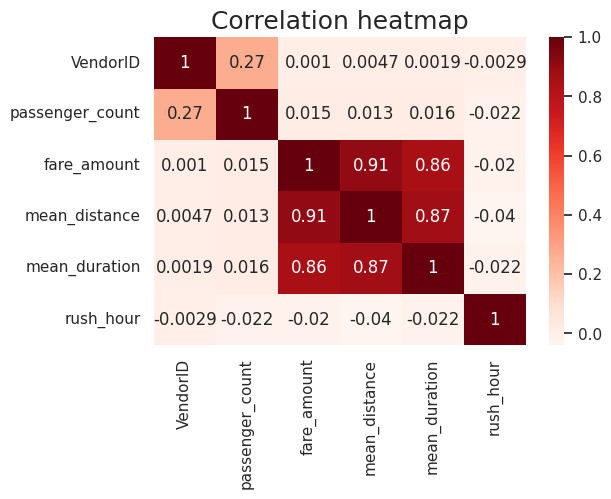

In [ ]:
df2.corr(method='pearson')
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

In [ ]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

In [ ]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype('string')

# Get dummies
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Standardize the X variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
# Fit your model to the training data

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model performance on the training data

r_sq = lr.score(X_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754144
MSE: 17.88973296349268
RMSE: 4.229625629236313


In [ ]:
# Evaluate the model performance on the testing data

r_sq_test = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593877
MSE: 14.326454156998947
RMSE: 3.7850302716093234


The model performance is high on both training and test sets, suggesting that there is no bias in the model and that the model is not overfit. In fact, the test scores were somewhat better.

For the test data, an R2 of 0.868 means that 86.8% of the variance in the fare_amount variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.